In [0]:
pip install datetime

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 235kB 7.3MB/s 


In [0]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy


In [0]:
# importing the required libraries
import pandas as pd
import numpy as np
import datetime


# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')



In [0]:
india_covid_19= pd.read_csv('covid_19_india.csv')

india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])








In [0]:
age_details = pd.read_csv('AgeGroupDetails.csv')
population =pd.read_csv('population_india_census2011.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
ICMR_details = pd.read_csv('ICMRTestingDetails.csv')
state_testing =pd.read_csv('StatewiseTestingDetails.csv')
state_testing

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3
...,...,...,...,...,...
196,2020-04-10,Odisha,3249,3201.0,48
197,2020-04-10,Punjab,3461,2972.0,151
198,2020-04-10,Rajasthan,22324,20673.0,520
199,2020-04-10,Tamil Nadu,8410,6838.0,911


In [0]:

cumulative_df = india_covid_19.groupby(["State/UnionTerritory", "Date"])["Confirmed", "Deaths", "Cured"].sum().reset_index()
cumulative_df["Date"] = pd.to_datetime(cumulative_df["Date"] , format="%m/%d/%Y").dt.date
cumulative_df = cumulative_df.sort_values(by="Date").reset_index(drop=True)
start_date = datetime.date(2020, 3, 14)
cumulative_df = cumulative_df[cumulative_df["Date"]>=start_date]
cumulative_df["Date"] = cumulative_df["Date"].astype(str)

fig = px.scatter(cumulative_df, x="Confirmed", y="Deaths", animation_frame="Date", animation_group="State/UnionTerritory",
           size="Confirmed", color="State/UnionTerritory", hover_name="State/UnionTerritory",
           log_x=False, size_max=55, range_x=[0,15000], range_y=[-20,800])

layout = go.Layout(
    title=go.layout.Title(
        text="Changes in number of confirmed & death cases over time in India states",
        x=0.5
    ),
    font=dict(size=14),
    xaxis_title = "Total number of confirmed cases",
    yaxis_title = "Total number of death cases"
)

fig.update_layout(layout)

fig.show()


In [0]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],2)
state_details['Deaths']['Madhya Pradesh#']=119

state_details['Deaths']=state_details['Deaths'].astype(np.float32)

state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Reds')

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,1574,188,110.000000,0.120000,0.070000
Tamil Nadu,911,44,8.000000,0.050000,0.010000
Delhi,903,25,14.000000,0.030000,0.020000
Rajasthan,553,21,3.000000,0.040000,0.010000
Telengana,504,43,9.000000,0.090000,0.020000
Madhya Pradesh,443,0,33.000000,0.000000,0.070000
Uttar Pradesh,433,32,4.000000,0.070000,0.010000
Andhra Pradesh,381,11,6.000000,0.030000,0.020000
Kerala,364,123,2.000000,0.340000,0.010000


In [0]:
import plotly.express as px

fig = px.pie(age_details, values='TotalCases', names='AgeGroup',title='Confirmed cases of India')
fig.show()

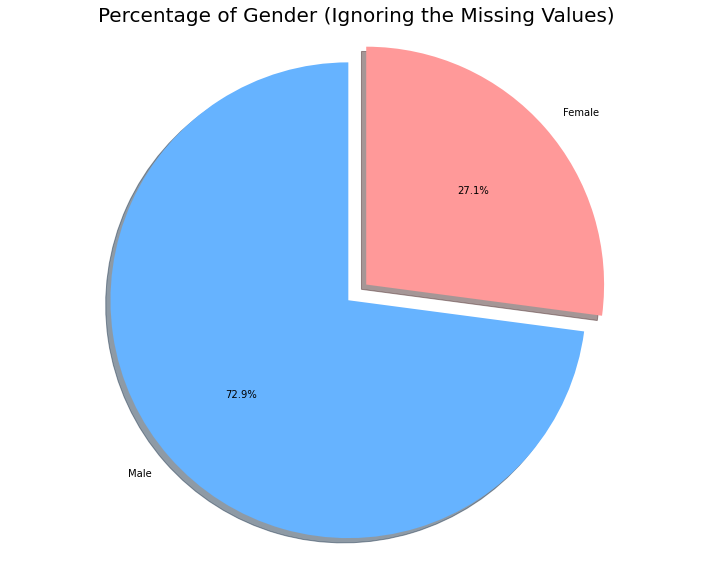

In [0]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

In [0]:

hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
hospital_beds.head



<bound method NDFrame.head of      Sno                   State/UT  ... Unnamed: 12 Unnamed: 13
0    1.0  Andaman & Nicobar Islands  ...         NaN         NaN
1    2.0             Andhra Pradesh  ...         NaN         NaN
2    3.0          Arunachal Pradesh  ...         NaN         NaN
3    4.0                      Assam  ...         NaN         NaN
4    5.0                      Bihar  ...         NaN         NaN
5    6.0                 Chandigarh  ...         NaN         NaN
6    7.0               Chhattisgarh  ...         NaN         NaN
7    8.0       Dadra & Nagar Haveli  ...         NaN         NaN
8    9.0                Daman & Diu  ...         NaN         NaN
9   10.0                      Delhi  ...         NaN         NaN
10  11.0                        Goa  ...         NaN         NaN
11  12.0                    Gujarat  ...         NaN         NaN
12  13.0                    Haryana  ...         NaN         NaN
13  14.0           Himachal Pradesh  ...         NaN        

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


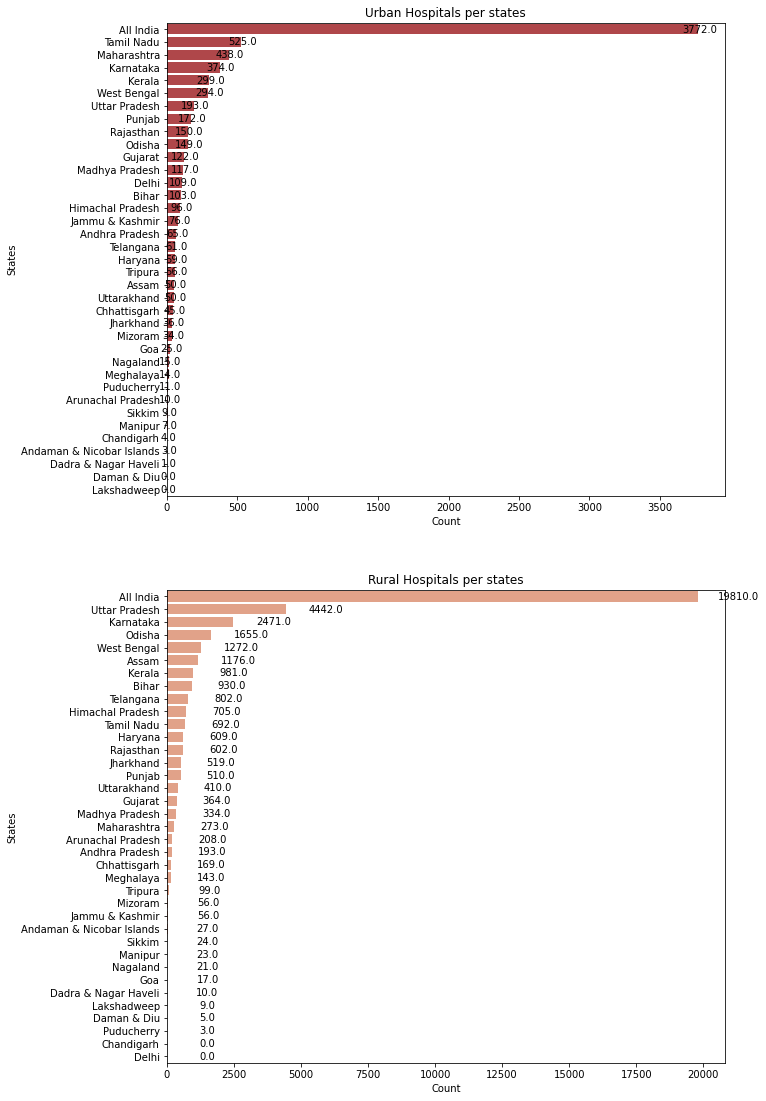

<Figure size 720x864 with 0 Axes>

In [0]:
plt.figure(figsize=(10,40))
plt.subplot(4,1,1)
hospital_beds=hospital_beds.sort_values('NumUrbanHospitals_NHP18', ascending= False)
sns.barplot(data=hospital_beds,y='State/UT',x='NumUrbanHospitals_NHP18',color=sns.color_palette('RdBu')[0])
plt.title('Urban Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospital_beds.shape[0]):
    count = hospital_beds.iloc[i]['NumUrbanHospitals_NHP18']
    plt.text(count+10,i,count,ha='center',va='center')

plt.subplot(4,1,2)
hospital_beds=hospital_beds.sort_values('NumRuralHospitals_NHP18', ascending= False)
sns.barplot(data=hospital_beds,y='State/UT',x='NumRuralHospitals_NHP18',color=sns.color_palette('RdBu')[1])
plt.title('Rural Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospital_beds.shape[0]):
    count = hospital_beds.iloc[i]['NumRuralHospitals_NHP18']
    plt.text(count+1500,i,count,ha='center',va='center')

plt.show()
plt.tight_layout()


In [0]:
ICMR_labs = pd.read_csv('ICMRTestingLabs.csv')

values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)
df = pd.DataFrame(list(zip(values, names)), 
               columns =['values', 'names'])

fig = px.bar(df, 
             x="values", 
             y="names", 
             orientation='h',
             height=1000,
             title='ICMR Testing Centers in each State')
fig.show()

In [0]:
testing=state_testing.groupby('State').sum().reset_index()
testing=testing.sort_values(['TotalSamples'], ascending=True)
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Testing statewise insight')
fig.show()

In [0]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')
train_df = pd.read_csv('covid-19-all.csv')


In [0]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

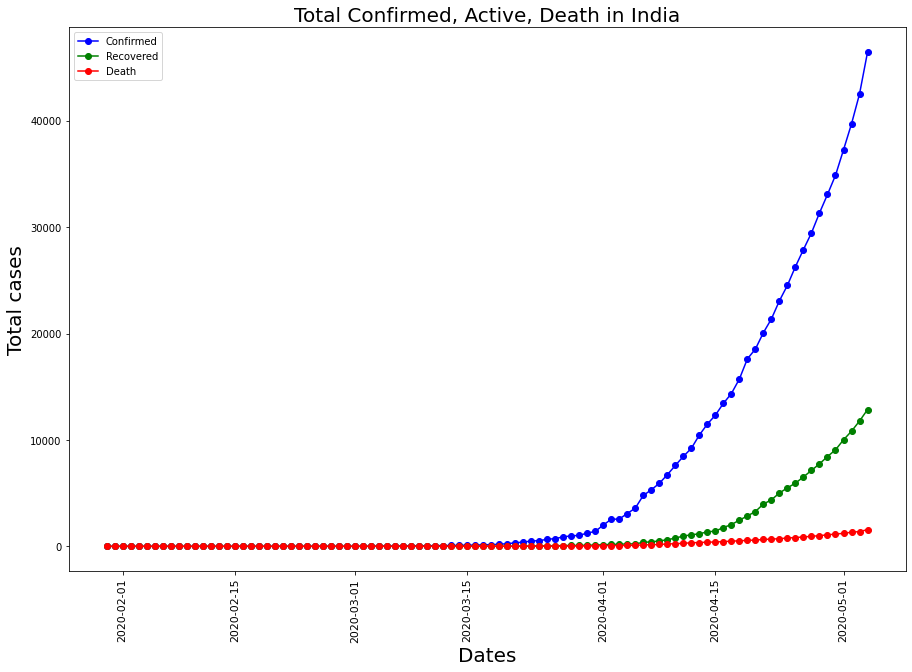

In [0]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();


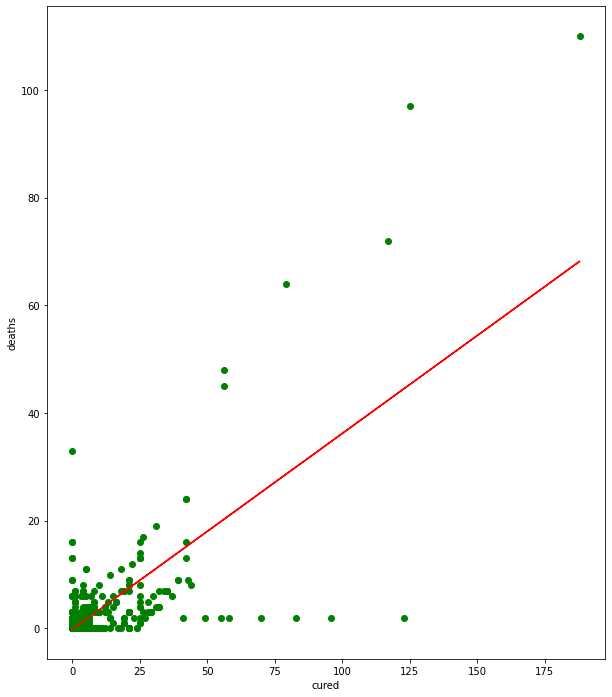

In [0]:
#predicting deaths and cure
from sklearn.linear_model import LinearRegression
model=LinearRegression()

X=india_covid_19[['Cured']]
Y=india_covid_19[['Deaths']]
model.fit(X,Y)

Y_pred=model.predict(X)
plt.scatter(X,Y,color='green')
plt.plot(X,Y_pred,color='red')
plt.xlabel('cured')
plt.ylabel('deaths')

plt.show()


In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Absolute Error: 1.7894427714801915
Mean Squared Error: 22.721087869669166
Root Mean Squared Error: 4.7666642287525525
Root Mean Squared Error: 4.7666642287525525


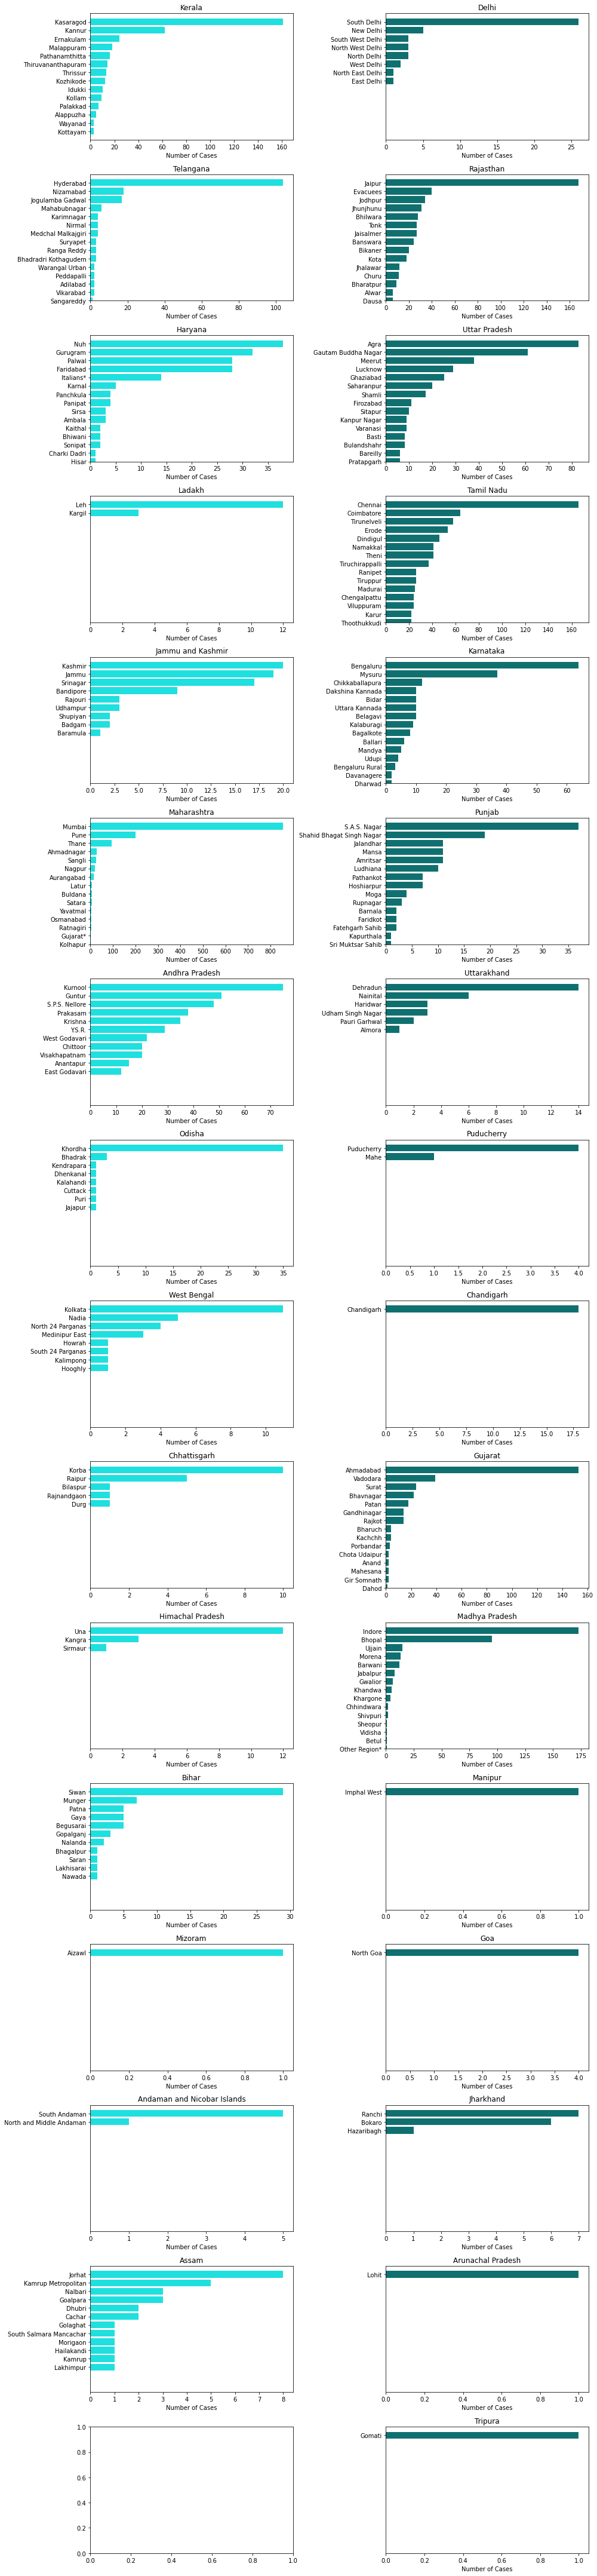

In [30]:
colors_list = ['cyan','teal']
states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/2)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,2,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
         g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
         plt.xlabel('Number of Cases')
         plt.ylabel('')
         plt.title(state)
         plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()
plt.show()

In [38]:
#Prediction using growth factor
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k =df1[df1['Country/Region']=='India'].loc[:,'2/4/20':]
india_confirmed = k.values.tolist()[0] 

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.1482214623244142


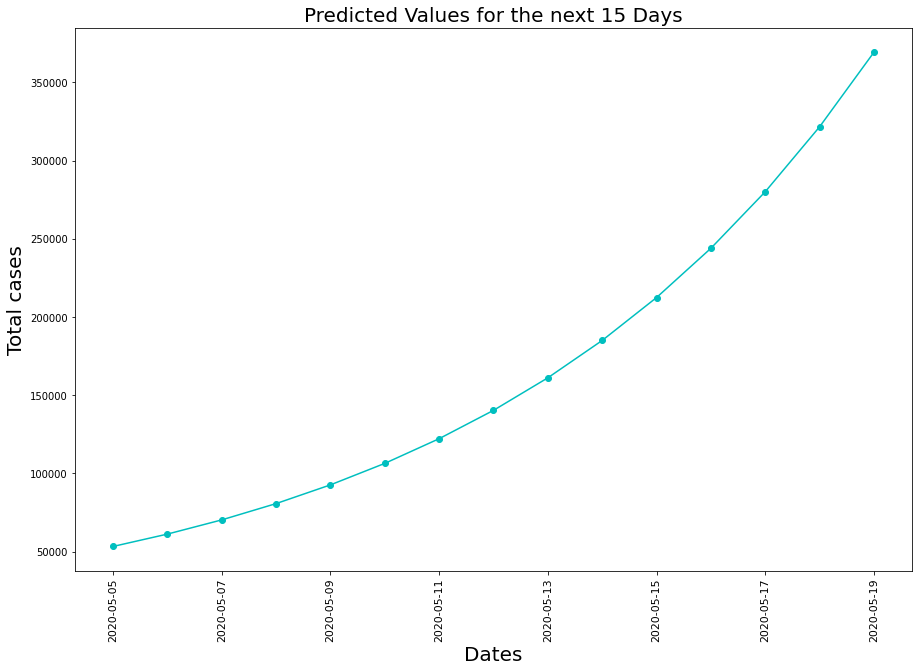

In [41]:
countries = ['China','US', 'Italy', 'Spain', 'France','India']
global_confirmed = []
for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0])

prediction_dates = []

start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed[5][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')
